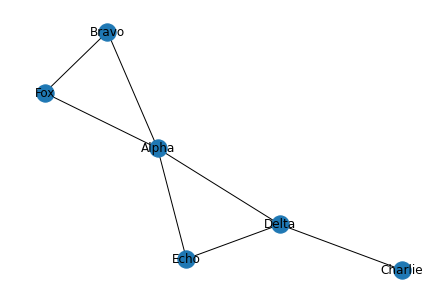

['Bravo', 'Alpha']
['Bravo', 'Fox']
['Charlie', 'Delta']
['Alpha', 'Fox']
['Alpha', 'Delta']
['Alpha', 'Echo']
['Delta', 'Echo']
['Bravo', 'Alpha', 'Fox']
['Alpha', 'Delta', 'Echo']


In [69]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

links = "[Alpha,Bravo]; [Alpha,Delta]; [Alpha,Echo]; [Alpha,Fox]; \
[Bravo,Alpha]; [Bravo,Fox]; \
[Charlie,Delta]; \
[Delta,Alpha]; [Delta,Charlie]; [Delta,Echo]; \
[Echo,Alpha]; [Echo,Delta]; \
[Fox,Alpha]; [Fox,Bravo];"

# Extract links from the string
edges = [link.strip('[];').split(',') for link in links.split()]

# Draw the initial graph
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True)
plt.show()

# Extract nodes from the links
nodes = set()
for edge in edges:
    nodes.add(edge[0])
    nodes.add(edge[1])

# Generate all possible subsets of nodes
subsets = []
for i in range(1, len(nodes) + 1):
    for subset in itertools.combinations(nodes, i):
        subsets.append(subset)

# Find all subgraphs of the graph that are connected even if a node is removed
subgraphs = []
for subset in subsets:
    edges_subset = []
    for edge in edges:
        if edge[0] in subset and edge[1] in subset:
            edges_subset.append(edge)
        elif any([e in edges_subset for e in [(edge[0], node), (edge[1], node)] for node in subset]):
            edges_subset.append(edge)
    if len(edges_subset) > 0:
        # Check if the subgraph is connected even if any node is removed
        is_cohesive = True
        for node in subset:
            # Remove the node from the subset
            new_subset = set(subset) - set([node])
            # Check if the resulting subgraph is connected
            visited = set()
            queue = [list(new_subset)[0]]
            while queue:
                vertex = queue.pop(0)
                if vertex not in visited:
                    visited.add(vertex)
                    neighbors = [edge[1] for edge in edges_subset if edge[0] == vertex and edge[1] in new_subset] + \
                                [edge[0] for edge in edges_subset if edge[1] == vertex and edge[0] in new_subset]
                    queue.extend(set(neighbors) - visited)
            if len(visited) != len(new_subset):
                is_cohesive = False
                break
        if is_cohesive:
            subgraphs.append(list(subset))

# Print the subgraphs
for subgraph in subgraphs:
    print(subgraph)